In [85]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#read csv file
df = pd.read_csv('data/DatosTest.csv', header=None)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count-1):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)
df.rename(columns={col_count-1: 'Class'}, inplace=True)

#encode all columns except the last one

le = LabelEncoder()
for i in range(col_count-1):
    df['X'+str(i)] = le.fit_transform(df['X'+str(i)])


# Dataset etiquetado

In [87]:
#Dataset completo
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Class
0,1,1,0,0,0,0,5,9,0,1
1,3,0,1,1,0,1,3,2,1,10
2,2,1,1,2,1,1,4,7,0,1
3,5,1,1,1,0,0,6,5,1,1
4,1,1,1,0,1,1,1,4,0,1
5,6,0,1,0,0,1,3,10,1,10
6,4,0,0,0,0,1,0,6,0,1
7,3,0,1,0,1,1,2,4,1,10
8,3,1,1,3,1,0,5,3,0,1
9,5,1,1,2,1,0,1,11,0,1


In [88]:
#Set de entrenamiento serán los primeros 10 registros
#Set de prueba serán los últimos 5
df_train = df.iloc[0:10]
df_test = df.iloc[10:]

#### Dataset entrenamiento


In [89]:
#Dataset de entrenamiento
df_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Class
0,1,1,0,0,0,0,5,9,0,1
1,3,0,1,1,0,1,3,2,1,10
2,2,1,1,2,1,1,4,7,0,1
3,5,1,1,1,0,0,6,5,1,1
4,1,1,1,0,1,1,1,4,0,1
5,6,0,1,0,0,1,3,10,1,10
6,4,0,0,0,0,1,0,6,0,1
7,3,0,1,0,1,1,2,4,1,10
8,3,1,1,3,1,0,5,3,0,1
9,5,1,1,2,1,0,1,11,0,1


#### Dataset prueba

In [90]:
#Dataset de prueba
df_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Class
10,7,0,0,0,0,0,2,8,1,10
11,0,1,1,2,1,0,3,0,0,1
12,3,0,0,0,0,0,7,3,1,10
13,1,0,1,0,0,1,0,5,0,1
14,0,0,1,0,0,0,3,1,0,1


Pesos de prueba generados de forma aleatoria de acuerdo a la cantidad de características del dataset

Aleatorios desde 0 hasta 1

In [91]:
#
#Set the weights and bias randomly (between 0 and 1)
w =[round(np.random.rand(),2) for x in range(col_count-1)]   
b = round(np.random.rand(),2)

#w[0]= 0.84
#w[1]= 0.394
#w[2]= 0.783

#b = 0
#learning rate
lr = 0.01
for i in range(col_count-1):
    print('w'+str(i)+' = '+str(w[i]))

print('b = '+str(b))


w0 = 0.98
w1 = 0.39
w2 = 0.5
w3 = 0.05
w4 = 0.55
w5 = 0.84
w6 = 0.69
w7 = 0.5
w8 = 0.43
b = 0.03


In [92]:
def func_sum(x)->int:
    '''Funcion de suma'''
    return np.dot(x,w)+b


### Entrenamiento

In [93]:
#Training
mse_list = []

glob_error = []
for i in range(1000):
    for j in range(df_train.shape[0]):
        x = df_train.iloc[j,:-1]
        y = df_train.iloc[j,-1]
        y_hat = func_sum(x)
        #MSE
        mse = (y - y_hat)**2
        print('MSE = '+str(mse))
        mse_list.append(mse)
        #calcular error
        error = y - y_hat
        #actualizar pesos
        for k in range(col_count-1):
            w[k] = w[k] + lr * error * x[k]
            #imprimir pesos
            print('w'+str(k)+' = '+str(w[k]))

    glob_error.append(np.mean(mse_list))

        




MSE = 69.7225
w0 = 0.8965
w1 = 0.3065
w2 = 0.5
w3 = 0.05
w4 = 0.55
w5 = 0.84
w6 = 0.2724999999999999
w7 = -0.25150000000000006
w8 = 0.43
MSE = 26.481316000000007
w0 = 1.05088
w1 = 0.3065
w2 = 0.5514600000000001
w3 = 0.10146000000000001
w4 = 0.55
w5 = 0.8914599999999999
w6 = 0.4268799999999999
w7 = -0.14858000000000005
w8 = 0.48146
MSE = 18.503418433600004
w0 = 0.9648488000000001
w1 = 0.2634844
w2 = 0.5084444
w3 = 0.015428800000000006
w4 = 0.5069844
w5 = 0.8484443999999999
w6 = 0.2548175999999999
w7 = -0.44968920000000007
w8 = 0.48146
MSE = 19.39099895884944
w0 = 0.74467274
w1 = 0.21944918800000002
w2 = 0.46440918800000003
w3 = -0.028606411999999998
w4 = 0.5069844
w5 = 0.8484443999999999
w6 = -0.00939367200000013
w7 = -0.6698652600000001
w8 = 0.437424788
MSE = 0.7654409040678828
w0 = 0.7534216879600001
w1 = 0.22819813596000002
w2 = 0.47315813596000006
w3 = -0.028606411999999998
w4 = 0.51573334796
w5 = 0.8571933479599999
w6 = -0.000644724040000124
w7 = -0.6348694681600001
w8 = 0.43742478

#### Pesos finales

In [94]:
#Best weights and bias
print('Mejores pesos y umbral')
for i in range(col_count-1):
    print('w'+str(i)+' = '+str(w[i]))

print('b = '+str(b))


Mejores pesos y umbral
w0 = -0.20485928422893013
w1 = -8.062197381354439
w2 = 4.425170292702108
w3 = -0.9609614997540731
w4 = 2.146076172522872
w5 = -0.1815612801557598
w6 = 0.7886722099575807
w7 = 0.4303959144037463
w8 = 1.8239714434722465
b = 0.03


#### Clasificamos el dataset de prueba

In [95]:
#Testing creating a new column with the predicted values
aux_df = df_test.copy()
aux_df['Predicted'] = aux_df.apply(lambda x: func_sum(x[:-1]), axis=1)
df_test = aux_df

df_test


,X0,X1,X2,X3,X4,X5,X6,X7,X8,Class,Predicted
10,7,0,0,0,0,0,2,8,1,10,5.440468
11,0,1,1,2,1,0,3,0,0,1,-1.016857
12,3,0,0,0,0,0,7,3,1,10,8.051287
13,1,0,1,0,0,1,0,5,0,1,6.220729
14,0,0,1,0,0,0,3,1,0,1,7.251583


#### Gráfica error cuadrático medio

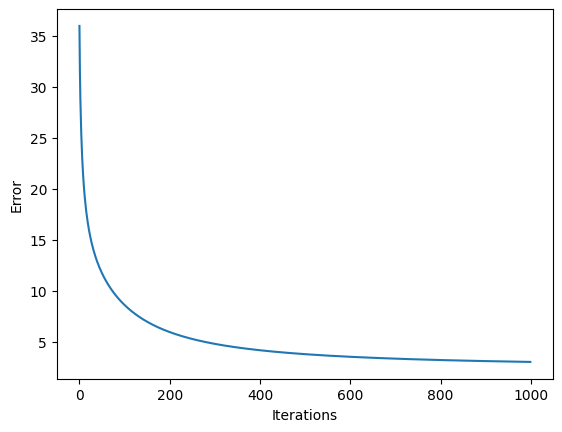

In [96]:
#Global error
plt.plot(glob_error)
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.show()
